# Libraries import

In [126]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import os

# Data preparation

## Data address 
Specifying address. If one's Google Drive is mounted and 'data' folder exists in it, it is used to store data files. Otherwise, present working directory is used for this purpose and `address` is set to be an empty string.

In [142]:
address = './drive/MyDrive/data/'

if not os.path.exists(address):
    address = ''

os.environ["FILES_ADDRESS"] = address

print('Address where data files are stored: ', os.getcwd() + os.environ["FILES_ADDRESS"][1:])

Address where data files are stored:  /content/drive/MyDrive/data/


## Download

In [135]:
!wget -O "${FILES_ADDRESS}Seattle_Real_Time_Fire_911_Calls.csv" https://data.seattle.gov/api/views/kzjm-xkqj/rows.csv?accessType=DOWNLOAD

--2022-12-13 07:52:39--  https://data.seattle.gov/api/views/kzjm-xkqj/rows.csv?accessType=DOWNLOAD
Resolving data.seattle.gov (data.seattle.gov)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.seattle.gov (data.seattle.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/MyDrive/data/Seattle_Real_Time_Fire_911_Calls.csv’

drive/MyDrive/data/     [              <=>   ] 197.21M  3.89MB/s    in 54s     

2022-12-13 07:53:34 (3.64 MB/s) - ‘drive/MyDrive/data/Seattle_Real_Time_Fire_911_Calls.csv’ saved [206786767]



## Reading

In [2]:
df = pd.read_csv(address + 'Seattle_Real_Time_Fire_911_Calls.csv',
                 parse_dates=[2], 
                 infer_datetime_format=True)

df.describe(include='all', datetime_is_numeric=True)

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
count,1744086,1744175,1744175,1.743015e+06,1.743015e+06,1743064,1744175
unique,222460,249,NaN,NaN,NaN,167378,1744175
top,517 3rd Av,Aid Response,NaN,NaN,NaN,POINT (-122.330863 47.602172),F190051945
freq,8012,850810,NaN,NaN,NaN,8239,1
mean,NaN,NaN,2014-01-08 14:24:01.523003904,4.762007e+01,-1.223311e+02,NaN,NaN
min,NaN,NaN,2003-11-07 09:30:48,4.725123e+01,-1.224847e+02,NaN,NaN
25%,NaN,NaN,2009-04-02 19:14:37.500000,4.758928e+01,-1.223486e+02,NaN,NaN
50%,NaN,NaN,2014-06-18 05:52:30,4.761335e+01,-1.223305e+02,NaN,NaN
75%,NaN,NaN,2018-10-13 04:45:05.500000,4.766163e+01,-1.223125e+02,NaN,NaN
max,NaN,NaN,2022-12-09 21:43:00,4.777779e+01,-1.217317e+02,NaN,NaN


## Filtering
This helps to retain the data with observations from the whole year and remove the years with missing months/days. Useful for unbaised view of follow-up count plots.

In [3]:
df =  df[(df.Datetime >= dt.datetime(2004, 1, 1)) & 
         (df.Datetime <= dt.datetime(2021, 12, 31))]
         
df.describe(include='all', datetime_is_numeric=True)

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
count,1620268,1620338,1620338,1.619488e+06,1.619488e+06,1619524,1620338
unique,208264,238,NaN,NaN,NaN,160530,1620338
top,517 3rd Av,Aid Response,NaN,NaN,NaN,POINT (-122.330863 47.602172),F190051945
freq,7999,791764,NaN,NaN,NaN,8224,1
mean,NaN,NaN,2013-07-05 00:59:48.436243968,4.762001e+01,-1.223311e+02,NaN,NaN
min,NaN,NaN,2004-01-01 00:03:24,4.725123e+01,-1.224769e+02,NaN,NaN
25%,NaN,NaN,2008-12-31 01:59:31,4.758911e+01,-1.223488e+02,NaN,NaN
50%,NaN,NaN,2013-11-26 12:21:06,4.761335e+01,-1.223305e+02,NaN,NaN
75%,NaN,NaN,2017-12-27 20:57:30,4.766162e+01,-1.223125e+02,NaN,NaN
max,NaN,NaN,2021-12-30 23:57:00,4.777669e+01,-1.218866e+02,NaN,NaN


# Data visualization

## Calls over all the years

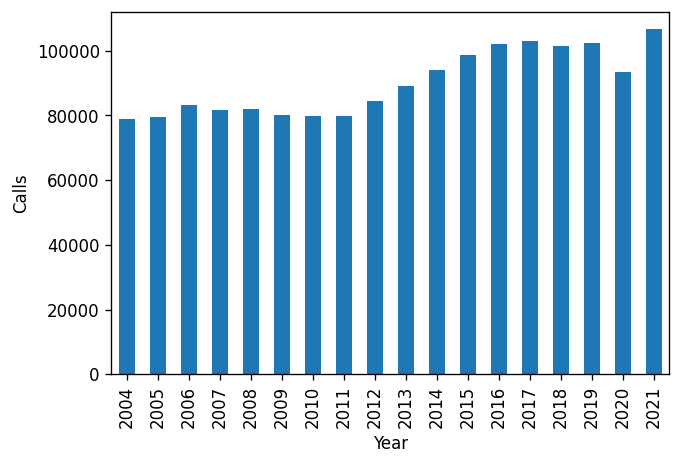

In [39]:
plt.figure(dpi=120)
df.Datetime.groupby(by=df.Datetime.dt.year).count().plot.bar()
plt.xlabel('Year')
plt.ylabel('Calls');

## Calls over months in a year

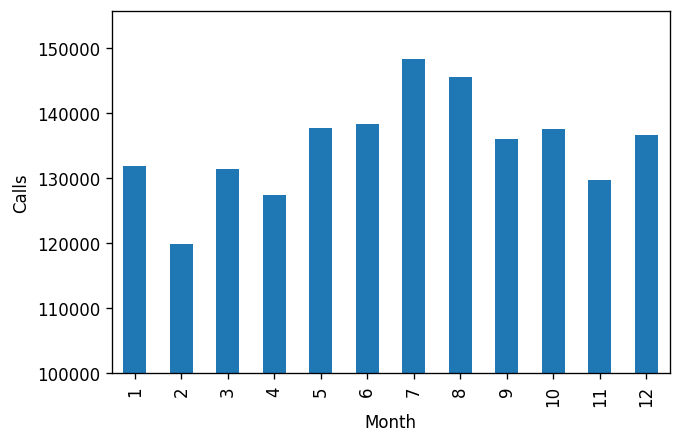

In [40]:
plt.figure(dpi=120)
df.Datetime.groupby(by=df.Datetime.dt.month).count().plot.bar()
plt.xlabel('Month')
plt.ylabel('Calls')
plt.ylim(100_000);

## Calls over days in a month

(30000.0, 58277.1)

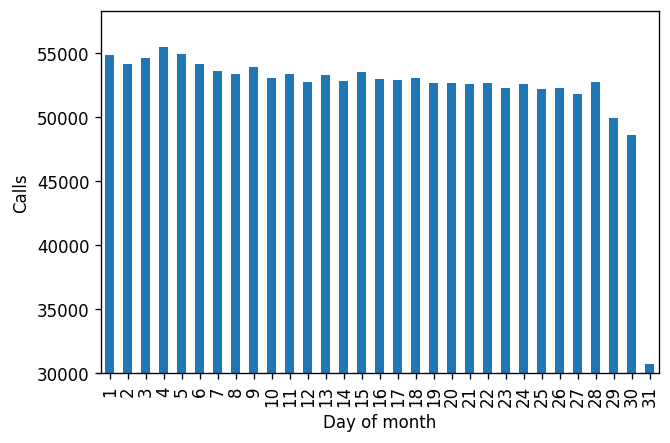

In [143]:
plt.figure(dpi=120)
df.Datetime.groupby(by=df.Datetime.dt.day).count().plot.bar()
plt.xlabel('Day of month')
plt.ylabel('Calls')
plt.ylim(30_000)

## Calls over days in a week

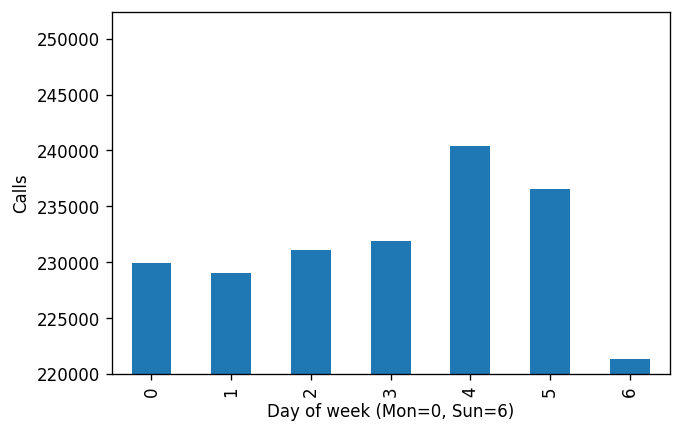

In [42]:
plt.figure(dpi=120)
df.Datetime.groupby(by=df.Datetime.dt.dayofweek).count().plot.bar()
plt.xlabel('Day of week (Mon=0, Sun=6)')
plt.ylabel('Calls')
plt.ylim(220_000);

## Calls over hours in a day

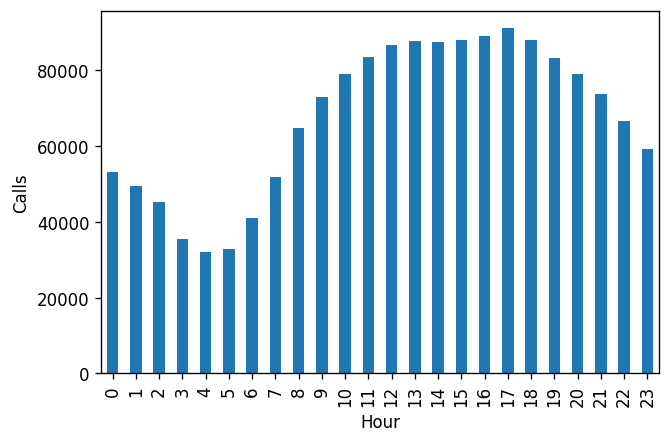

In [145]:
plt.figure(dpi=120)
df.Datetime.groupby(by=df.Datetime.dt.hour).count().plot.bar()
plt.xlabel('Hour')
plt.ylabel('Calls');

## Frequency of types of calls

In [75]:
df.Type.value_counts()

Aid Response                      791764
Medic Response                    291476
Auto Fire Alarm                    91985
Trans to AMR                       79788
Aid Response Yellow                34122
                                   ...  
Explosion Unk Situation                1
Weapons of Mass Destruction            1
Rescue Lock In/Out Yellow              1
WBRSHX - Brush Fire / Exposure         1
Tunnel MVI Medic                       1
Name: Type, Length: 238, dtype: int64

## Geographic distribution of calls

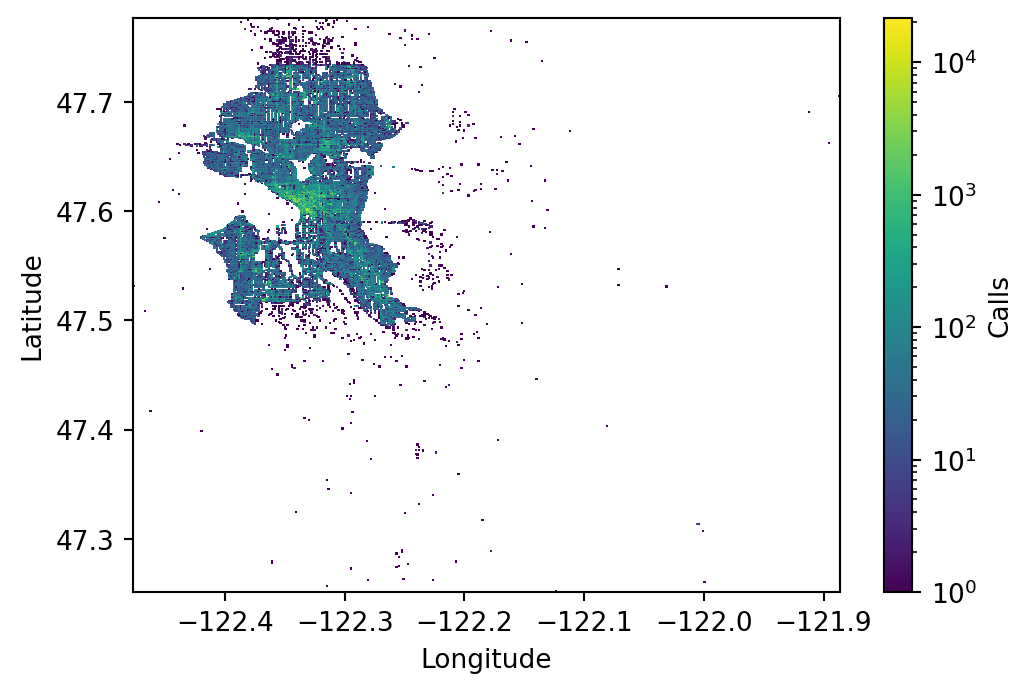

In [44]:
plt.figure(dpi=190)
plt.hist2d(df.Longitude, 
           df.Latitude, 
           range=((df.Longitude.min(), df.Longitude.max()), 
                  (df.Latitude.min(), df.Latitude.max())),
           bins=500,
           norm=mpl.colors.LogNorm())
plt.colorbar(label = 'Calls')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

# Feature extraction

In [77]:
df_interest = df[['Datetime']][df.Datetime >= dt.datetime(2016, 1, 1)]

df_interest = df_interest.groupby([df_interest.Datetime.dt.date, df_interest.Datetime.dt.hour]).count()
df_interest = df_interest.rename(columns={'Datetime':'Volume'})

df_interest.index = df_interest.index.rename(['Date', 'Hour'])
df_interest = df_interest.reset_index()

df_interest['Date'] = pd.to_datetime(df_interest.Date)
df_interest['Month'] = df_interest.Date.dt.month
df_interest['Weekday'] = df_interest.Date.dt.dayofweek

us_cal = USFederalHolidayCalendar()
us_cal_freq = pd.tseries.offsets.CustomBusinessDay(calendar=us_cal)
work_days = pd.date_range(start="1/1/2016",end="12/09/2022", freq=us_cal_freq)
df_interest['Holiday'] = df_interest['Date'].apply(lambda x: 0 if (x in work_days) else 1)

df_interest = df_interest[['Date', 'Month', 'Weekday', 'Hour', 'Holiday', 'Volume']]

df_interest

,Date,Month,Weekday,Hour,Holiday,Volume
0,2016-01-01,1,4,0,1,24
1,2016-01-01,1,4,1,1,33
2,2016-01-01,1,4,2,1,16
3,2016-01-01,1,4,3,1,15
4,2016-01-01,1,4,4,1,12
...,...,...,...,...,...,...
52485,2021-12-30,12,3,19,0,19
52486,2021-12-30,12,3,20,0,20
52487,2021-12-30,12,3,21,0,19
52488,2021-12-30,12,3,22,0,19


# Weather data incorporation

## Downloading weather data
Obtained by submitting a request here: https://www.ncdc.noaa.gov/cdo-web/datasets  with the following details:  

Type: Daily summaries  
Date range: (1) Jan 1, 2016 - Dec 31, 2018 (2) Jan 1, 2019 - Dec 31, 2021  
Search for: Stations  
Search Term: Seattle

Despite extensive effort, the (free of cost) hourly data could not be found.

The first two links below are valid until Dec 18, 2022.

In [140]:
!wget -O "${FILES_ADDRESS}weather_2016_2018.csv" https://www.ncei.noaa.gov/orders/cdo/3169935.csv
!wget -O "${FILES_ADDRESS}weather_2019_2021.csv" https://www.ncei.noaa.gov/orders/cdo/3169979.csv

!wget -O "${FILES_ADDRESS}ghcnd-stations.txt" http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt

--2022-12-13 07:57:43--  https://www.ncei.noaa.gov/orders/cdo/3169935.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.168, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8134566 (7.8M) [text/csv]
Saving to: ‘./drive/MyDrive/data/weather_2016_2018.csv’

./drive/MyDrive/dat 100%[===================>]   7.76M  19.1MB/s    in 0.4s    

2022-12-13 07:57:44 (19.1 MB/s) - ‘./drive/MyDrive/data/weather_2016_2018.csv’ saved [8134566/8134566]

--2022-12-13 07:57:44--  https://www.ncei.noaa.gov/orders/cdo/3169979.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.168, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115320 (113K) [text/csv]
Saving to: ‘./drive/MyDrive/data/weather_2019_2021.csv’

./drive/MyDriv

## Reading weather data
There are two files: one from 2016 - 1018 and the second from 2019 - 2021. The data from multiple weather stations.

In [138]:
df_weather = pd.read_csv(address + 'weather_2016_2018.csv')
df_weather = df_weather.append(pd.read_csv(address + 'weather_2019_2021.csv'))
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
df_weather.describe(include='all', datetime_is_numeric=True)

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT11
count,106898,106898,106898,6534.000000,104368.000000,47079.000000,2192.000000,17108.000000,17069.000000,1769.0,146.0,69.0,15.0,27.0,1.0,253.0,13.0
unique,153,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2192,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017-07-04 17:40:05.814888960,6.640375,0.142548,0.025986,53.652372,60.304419,44.815103,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,NaN,NaN,2016-01-01 00:00:00,0.220000,0.000000,0.000000,20.000000,22.000000,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,NaN,NaN,2016-09-21 00:00:00,4.470000,0.000000,0.000000,45.000000,50.000000,38.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,NaN,NaN,2017-06-25 00:00:00,6.040000,0.010000,0.000000,53.000000,59.000000,45.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,NaN,NaN,2018-04-06 00:00:00,8.280000,0.160000,0.000000,62.000000,71.000000,52.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,NaN,NaN,2021-12-31 00:00:00,23.940000,5.500000,13.000000,91.000000,117.000000,87.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Locating station with most observations

The station with ID 'USW00024233' has most frequest observations.

In [17]:
df_weather.STATION.value_counts()

USW00024233    2192
US1WAKG0005    1096
USW00094274    1096
USW00094248    1096
USC00455525    1096
               ... 
US1WAKG0142      61
US1WAIS0042      41
US1WAKG0204      28
US1WAKG0172       6
US1WAKG0016       5
Name: STATION, Length: 153, dtype: int64

## Reading weather stations data

In [139]:
df_stations = pd.read_csv(address + 'ghcnd-stations.txt', 
                          on_bad_lines='skip',
                          sep='\s+',
                          names=['Id', 'Latitude', 'Longitude', 'Elevation', 'Address1', 'Address2', 'Address3', 'Address4'])
df_stations

,Id,Latitude,Longitude,Elevation,Address1,Address2,Address3,Address4
0,ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD
1,ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH,INTER.,AIRP,GSN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217
...,...,...,...,...,...,...,...,...
123179,ZI000067969,-21.0500,29.3670,861.0,WEST,NICHOLSON,67969,NaN
123180,ZI000067975,-20.0670,30.8670,1095.0,MASVINGO,67975,NaN,NaN
123181,ZI000067977,-21.0170,31.5830,430.0,BUFFALO,RANGE,67977,NaN
123182,ZI000067983,-20.2000,32.6160,1132.0,CHIPINGE,GSN,67983,NaN


### Distribution of stations globally

<Figure size 720x480 with 0 Axes>

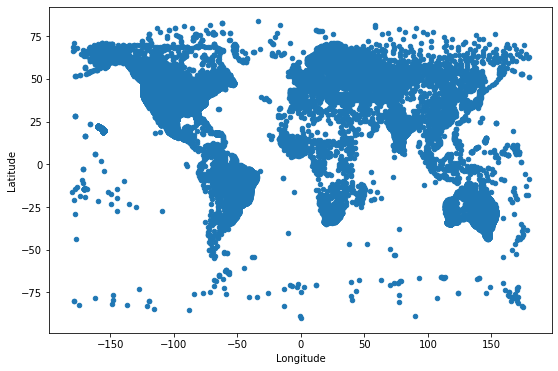

In [30]:
plt.figure(dpi=120)
df_stations.plot.scatter(x = 'Longitude', y='Latitude', figsize=(9, 6));

## Overplot of stations over the distribution of calls

The big cyan dot correspond to Tacoma station (ID: 'USW00024233'). It has the most weather observations and it lies within the region from where calls are made.

,Id,Latitude,Longitude,Elevation,Address1,Address2,Address3,Address4
121645,USW00024233,47.4444,-122.3139,112.8,WA,SEATTLE,TACOMA,INTL


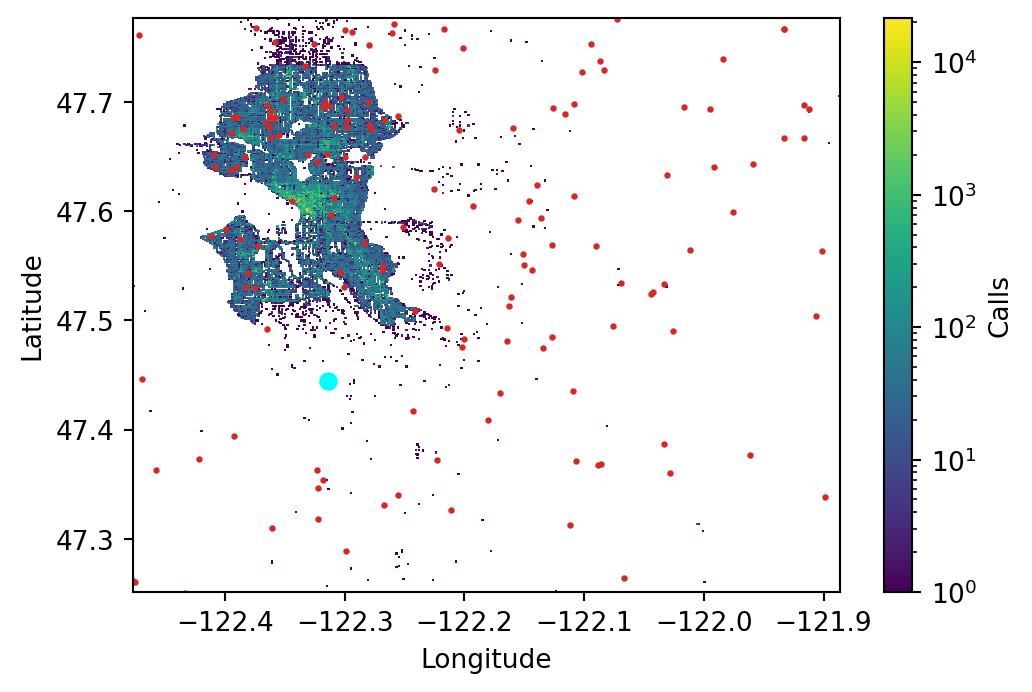

In [45]:
plt.figure(dpi=190)
plt.hist2d(df.Longitude, 
           df.Latitude, 
           range=((df.Longitude.min(), df.Longitude.max()), 
                  (df.Latitude.min(), df.Latitude.max())),
           bins=500,
           norm=mpl.colors.LogNorm())
plt.colorbar(label = 'Calls')
plt.scatter(df_stations['Longitude'], df_stations['Latitude'], s=2, c='C3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
                                 
df_station_tacoma = df_stations[df_stations.Id == df_weather.STATION.value_counts().index[0]]

plt.scatter(df_station_tacoma['Longitude'], df_station_tacoma['Latitude'], c='cyan')
df_station_tacoma

## Filtering & cleaning data of Tacoma weather station

In [78]:
df_weather_seattle = df_weather[df_weather.STATION.isin(df_station_tacoma.Id)].copy()
df_weather_seattle['DATE'] = pd.to_datetime(df_weather_seattle['DATE'])
df_weather_seattle = df_weather_seattle.rename(columns={'DATE':'Date'})
df_weather_seattle = df_weather_seattle.drop(columns=['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT11'])
df_weather_seattle = df_weather_seattle.dropna()
df_weather_seattle.describe(include='all', datetime_is_numeric=True)

,STATION,NAME,Date,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
count,2189,2189,2189,2189.000000,2189.000000,2189.000000,2189.00000,2189.000000,2189.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2189,2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2018-12-30 00:09:12.581087232,7.991818,0.112979,0.024943,53.68159,61.725902,46.729557
min,NaN,NaN,2016-01-01 00:00:00,1.340000,0.000000,0.000000,20.00000,27.000000,17.000000
25%,NaN,NaN,2017-07-01 00:00:00,5.820000,0.000000,0.000000,45.00000,51.000000,40.000000
50%,NaN,NaN,2018-12-30 00:00:00,7.610000,0.000000,0.000000,53.00000,60.000000,47.000000
75%,NaN,NaN,2020-06-29 00:00:00,9.620000,0.110000,0.000000,62.00000,72.000000,54.000000
max,NaN,NaN,2021-12-31 00:00:00,21.030000,3.250000,8.900000,91.00000,108.000000,73.000000


## Merging calls data with weather data

In [106]:
df_interest_weather = pd.merge(df_interest, df_weather_seattle[['Date', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']], 
                                       on=['Date'])
df_interest_weather

,Date,Month,Weekday,Hour,Holiday,Volume,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2016-01-01,1,4,0,1,24,4.92,0.00,0.0,36.0,46.0,28.0
1,2016-01-01,1,4,1,1,33,4.92,0.00,0.0,36.0,46.0,28.0
2,2016-01-01,1,4,2,1,16,4.92,0.00,0.0,36.0,46.0,28.0
3,2016-01-01,1,4,3,1,15,4.92,0.00,0.0,36.0,46.0,28.0
4,2016-01-01,1,4,4,1,12,4.92,0.00,0.0,36.0,46.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52413,2021-12-29,12,2,19,0,19,8.50,0.13,0.9,26.0,29.0,22.0
52414,2021-12-29,12,2,20,0,17,8.50,0.13,0.9,26.0,29.0,22.0
52415,2021-12-29,12,2,21,0,21,8.50,0.13,0.9,26.0,29.0,22.0
52416,2021-12-29,12,2,22,0,16,8.50,0.13,0.9,26.0,29.0,22.0


# Correlation of calls with features

In [86]:
df_interest_weather.corr()['Volume']

Month      0.027999
Weekday   -0.017911
Hour       0.437556
Holiday   -0.036625
Volume     1.000000
AWND      -0.009208
PRCP      -0.000573
SNOW       0.019901
TAVG       0.081438
TMAX       0.087818
TMIN       0.064918
Name: Volume, dtype: float64

The precipation feature 'PRCP' has been dropped because of its low correlation with calls volume

In [107]:
df_interest_weather = df_interest_weather.drop(columns=['PRCP'])

# Test & train split

Train period: Jan 01, 2016 to Dec 31, 2020 (5 years)  
Test period: Jan 01, 2021 to Dec 31, 2021 (1 year)

In [108]:
X = df_interest_weather.drop(columns=['Volume'])

X_train = X[(X.Date >= dt.datetime(2016, 1, 1)) &
            (X.Date <= dt.datetime(2020, 12, 31))]
X_train = X_train.drop(columns=['Date'])

X_test =  X[(X.Date >= dt.datetime(2021, 1, 1)) & 
            (X.Date <= dt.datetime(2021, 12, 31))]
X_test = X_test.drop(columns=['Date'])

X_test

,Month,Weekday,Hour,Holiday,AWND,SNOW,TAVG,TMAX,TMIN
43760,1,4,0,1,10.07,0.0,48.0,52.0,45.0
43761,1,4,1,1,10.07,0.0,48.0,52.0,45.0
43762,1,4,2,1,10.07,0.0,48.0,52.0,45.0
43763,1,4,3,1,10.07,0.0,48.0,52.0,45.0
43764,1,4,4,1,10.07,0.0,48.0,52.0,45.0
...,...,...,...,...,...,...,...,...,...
52413,12,2,19,0,8.50,0.9,26.0,29.0,22.0
52414,12,2,20,0,8.50,0.9,26.0,29.0,22.0
52415,12,2,21,0,8.50,0.9,26.0,29.0,22.0
52416,12,2,22,0,8.50,0.9,26.0,29.0,22.0


In [109]:
y = df_interest_weather[['Date', 'Volume']]

y_train = y[(X.Date >= dt.datetime(2016, 1, 1)) &
            (X.Date <= dt.datetime(2020, 12, 31))]
y_train = y_train['Volume']

y_test =  y[(y.Date >= dt.datetime(2021, 1, 1)) & 
            (y.Date <= dt.datetime(2021, 12, 31))]
y_test = y_test['Volume']

y_test

43760    14
43761    16
43762    14
43763     9
43764     9
         ..
52413    19
52414    17
52415    21
52416    16
52417    12
Name: Volume, Length: 8658, dtype: int64

# Model fitting

## Gradient boost regressor

In [110]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
print(f"R\N{SUPERSCRIPT TWO}: %.4f" % reg.score(X_test, y_test))
print("RMSE: %.4f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
print("MAE: %.4f" % np.mean(np.absolute((y_hat - y_test))))

R²: 0.4168
RMSE: 3.8970
MAE: 3.0133


## XGBoost regressor

In [111]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror') 
xgbr.fit(X_train, y_train)
y_hat = xgbr.predict(X_test)
print(f"R\N{SUPERSCRIPT TWO}: %.4f" % xgbr.score(X_test, y_test)  )
print("RMSE: %.4f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
print("MAE: %.4f" % np.mean(np.absolute((y_hat - y_test))))

R²: 0.4170
RMSE: 3.8965
MAE: 3.0131


## Actual vs predicted calls

### Over a week

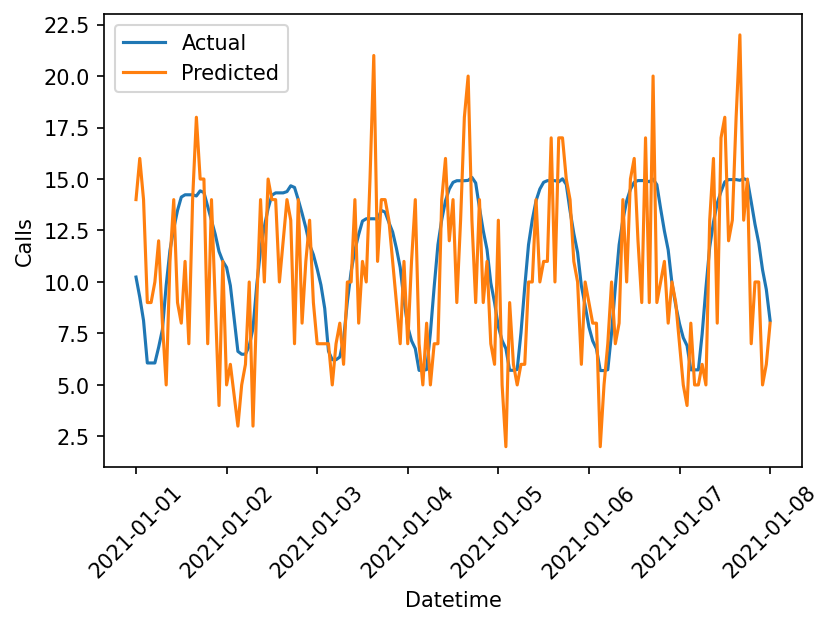

In [112]:
days = 7
hours = days * 24

df_interest_weather['Datetime'] = pd.to_datetime(df_interest_weather['Date'].astype(str) + 
                                         df_interest_weather['Hour'].astype(str), 
                                         format='%Y-%m-%d%H')

y_hat = xgbr.predict(X_test)

plt.figure(dpi = 150)
plt.plot(df_interest_weather.Datetime[df_interest_weather.Datetime >= dt.datetime(2021, 1, 1)][:hours], 
         y_hat[:hours], label='Actual')
plt.plot(df_interest_weather.Datetime[df_interest_weather.Datetime >= dt.datetime(2021, 1, 1)][:hours], 
         y_test[:hours].values, label='Predicted')

plt.xlabel('Datetime')
plt.ylabel('Calls')

plt.xticks(rotation = 45)
plt.legend();

### Over a month

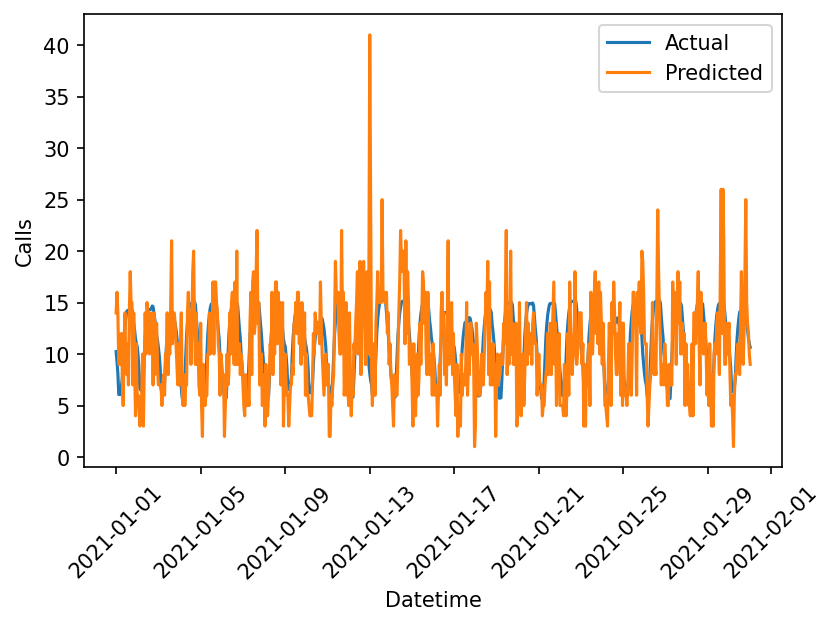

In [157]:
days = 30
hours = days * 24

df_interest_weather['Datetime'] = pd.to_datetime(df_interest_weather['Date'].astype(str) + 
                                         df_interest_weather['Hour'].astype(str), 
                                         format='%Y-%m-%d%H')
y_hat = xgbr.predict(X_test)

plt.figure(dpi = 150)
plt.plot(df_interest_weather.Datetime[df_interest_weather.Datetime >= dt.datetime(2021, 1, 1)][:hours], 
         y_hat[:hours], label='Actual')
plt.plot(df_interest_weather.Datetime[df_interest_weather.Datetime >= dt.datetime(2021, 1, 1)][:hours], 
         y_test[:hours].values, label='Predicted')

plt.xlabel('Datetime')
plt.ylabel('Calls')

plt.xticks(rotation = 45)
plt.legend();